# Matplotlib   

- Matplotlib은 NumPy 배열을 기반으로 만들어지 다중 플랫폼 데이터 시각화 라이브러리로서 광범위한 사이파이( SciPy ) 스택과 함께 작업하기 위해 설계됐다.
- 파이썬 표준 시각화 도구라 부를 수 있을 정도로 2D 평면 그래프에 관한 다양한 포맷과 기능을 지원한다.
- 객체지향 프로그래밍을 지원하므로 그래프 요소를 세세하게 꾸밀 수 있다.


- 최신 버전의 Matplotlib은 새로운 플로팅 스타일을 설정하기가 비교적 쉽고, 더 깔끔하고 현대적인 API를 통해 Matplotlib을 구동하기 위해 막강한 내부 로직을 기반으로 한 새로운 패키지가 개발되고 있다.
- Seaborn, ggplot, HoloViews, Altair는 물론 Pandas 자체도 Matplotlib API의 Wrapper로 사용될 수 있다.
- 이러한 Wrapper를 사용해도 최종 산출된 plot을 조정하기 위해 Matplotlib의 구문을 탐구하는 것이 유용할 때가 많다.

#### 노트북에 plot의 정적 이미지를 삽입할 수 있다.
#### %matplotlib notebook : 노트북 내에 대화형 plot을 삽입할 수 있다.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Matplotlib 한글 폰트 오류 해결

- Matplotlib은 한글 폰트를 지원하지 않는 문제가 있다.
- 그래프를 출력할 때 한글 폰트가 깨지는 현상이 발생한다.
- 오류를 해결하려면 Matplotlib을 사용하는 파이썬 프로그램의 앞부분에 한글 폰트를 지정하는 코드를 추가한다.

In [4]:
# Matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

### 데이터프레임 준비

In [5]:
df = pd.read_excel( '시도별 전출입 인구수.xlsx', fillna = 0, header = 0 )
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [11]:
# 누락값( 결측치, NaN )을 앞 데이터로 채움
df = df.fillna( method = 'ffill' )

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = ( df[ '전출지별' ] == '서울특별시' ) & ( df[ '전입지별' ]!= '서울특별시' )
df_seoul = df[ mask ]
df_seoul = df_seoul.drop( [ '전출지별' ], axis = 1 )
df_seoul.rename( { '전입지별' : '전입자' }, axis = 1, inplace = True )
df_seoul.set_index( '전입자', inplace = True )

df_seoul.head( 10 )

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입자,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


## 선 그래프( line plot )

- 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타낸다.
- 특히, 시계열 데이터와 같이 연속적인 값의 변화와 패턴을 파악하는데 적합하다.

In [12]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one = df_seoul.loc[ '경기도' ]
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

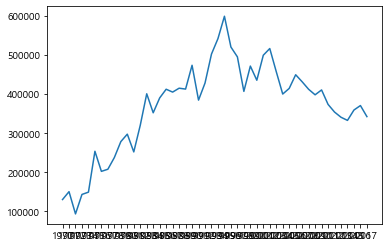

In [13]:
# x, y축 데이터를 plot함수에 입력
plt.plot( sr_one.index, sr_one.values )

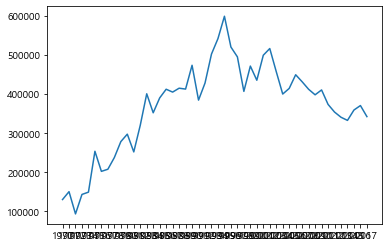

In [14]:
# Pandas Object를 Plot함수에 입력
plt.plot( sr_one )

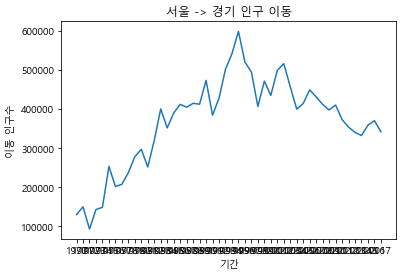

In [15]:
# x, y축 데이터를 plot함수에 입력
plt.plot( sr_one.index, sr_one.values )

# 차트 제목 추가
plt.title( '서울 -> 경기 인구 이동' )

# 축 이름 추가
plt.xlabel( '기간' )
plt.ylabel( '이동 인구수' )

plt.show() # 변경사항 저장하고 그래프 출력

#### 그래프 꾸미기

- x축 눈금 라벨의 글씨가 서로 겹쳐 잘 보이지 않는 문제는 눈금 라벨이 들어갈 만한 충분한 여유 공간이 없어서 발생하는 문제이다.
- 첫째, 공간을 만들기 위해 figure() 함수로 그림틀의 가로 사이즈를 더 크게 설정하고, 둘째 xticks() 함수를 활용하여 x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글씨가 서로 겹치지 않게 만든다.

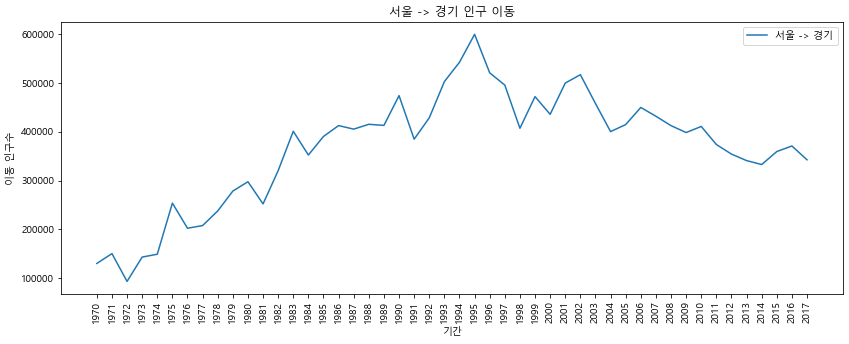

In [16]:
# 그림 사이즈 지정( 가로 14인치, 세로 5인치 )
plt.figure( figsize = ( 14, 5 ) )

# x축 눈금 라벨 회전하기
plt.xticks( rotation = 'vertical' )

# x, y축 데이터를 plot함수에 입력
plt.plot( sr_one.index, sr_one.values )

# 차트 제목 추가
plt.title( '서울 -> 경기 인구 이동' )

# 축 이름 추가
plt.xlabel( '기간' )
plt.ylabel( '이동 인구수' )

# 범례 표시
plt.legend( labels = [ '서울 -> 경기' ], loc = 'best' )

plt.show() # 변경사항 저장하고 그래프 출력

#### Matplotlib 스타일 서식 종류

- 스타일의 종류 : 'classic', 'bmh', 'dark_background', 'fast', grayscale', 'ggplot', 'seaborn'등

In [18]:
print( plt.style.available ) # 현재 실행환경에서 사용 가능한 Matplotlib의 스타일 옵션 확인

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


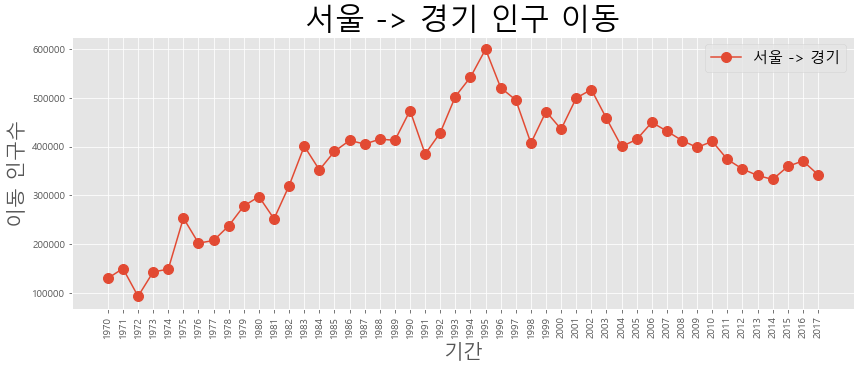

In [17]:
# 스타일 서식 지정
plt.style.use( 'ggplot' )

# 그림 사이즈 지정( 가로 14인치, 세로 5인치 )
plt.figure( figsize = ( 14, 5 ) )

# x축 눈금 라벨 회전하기
plt.xticks( rotation = 'vertical' )

# x, y축 데이터를 plot함수에 입력, 마커 표시 추가
plt.plot( sr_one.index, sr_one.values, marker = 'o', markersize = 10 )

# 차트 제목 추가
plt.title( '서울 -> 경기 인구 이동', size = 30 )

# 축 이름 추가
plt.xlabel( '기간', size = 20 )
plt.ylabel( '이동 인구수', size = 20 )

# 범례 표시
plt.legend( labels = [ '서울 -> 경기' ], loc = 'best', fontsize = 15 )

plt.show() # 변경사항 저장하고 그래프 출력

#### 그래프에 대한 설명을 덧붙이는 주석

- annotate() 함수 사용
- 주석 내용( text )을 넣을 위치와 정렬 방법 등을 annotate() 함수에 함께 전달한다.
- arrowprops 옵션을 사용하면 텍스트 대신 화살표가 표시된다. 화살표 스타일, 시작점과 끝점의 좌표를 입력
- 주석을 넣을 여백 공간을 충분히 확보하기 위해 ylim() 함수를 사용하여 y축 범위를 먼저 늘려준다. 그리고 annotate() 함수로 화살표와 텍스트 위치를 잡아서 배치한다.
- 위치를 나타내는 ( x, y ) 좌표에서 x값은 인데스 번호를 사용한다.
- annotate() 함수의 rotation 옵션에서 양( + )의 회전 방향은 반시계방향이다.
- 글자를 위아래 세로 방향으로 정렬하는 va 옵션은 'center', 'top', 'bottom', 'baseline'이 있다.
- 좌우 가로 방향으로 정렬하는 ha 옵션에는 'center', 'left', 'right'가 있다.   

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html

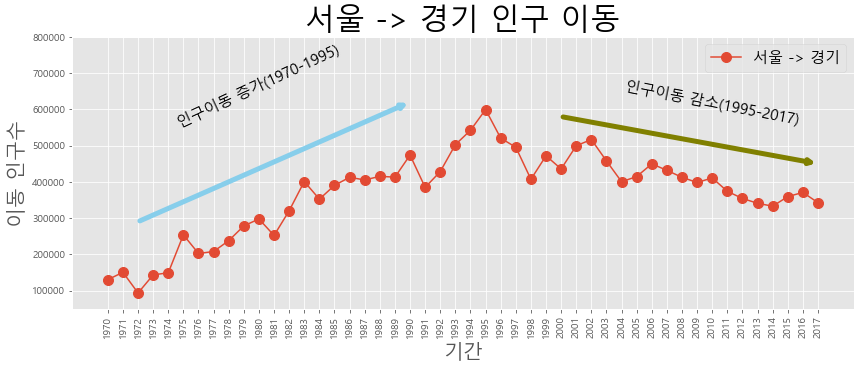

In [20]:
# 스타일 서식 지정
plt.style.use( 'ggplot' )

# 그림 사이즈 지정( 가로 14인치, 세로 5인치 )
plt.figure( figsize = ( 14, 5 ) )

# x축 눈금 라벨 회전하기
plt.xticks( rotation = 'vertical' )

# x, y축 데이터를 plot함수에 입력, 마커 표시 추가
plt.plot( sr_one.index, sr_one.values, marker = 'o', markersize = 10 )

# 차트 제목 추가
plt.title( '서울 -> 경기 인구 이동', size = 30 )

# 축 이름 추가
plt.xlabel( '기간', size = 20 )
plt.ylabel( '이동 인구수', size = 20 )

# 범례 표시
plt.legend( labels = [ '서울 -> 경기' ], loc = 'best', fontsize = 15 )

# y축 범위 지정 (최소값, 최대값)
plt.ylim( 50000, 800000 )

# 주석 표시 - 화살표
plt.annotate( '',
              xy = ( 20, 620000 ),       #화살표의 머리 부분(끝점)
              xytext = ( 2, 290000 ),    #화살표의 꼬리 부분(시작점)
              xycoords = 'data',         #좌표체계
              arrowprops = dict( arrowstyle = '->', color = 'skyblue', lw = 5 ), #화살표 서식
             )

plt.annotate( '',
              xy = ( 47, 450000 ),       #화살표의 머리 부분(끝점)
              xytext = ( 30, 580000 ),   #화살표의 꼬리 부분(시작점)
              xycoords = 'data',         #좌표체계
              arrowprops = dict( arrowstyle = '->', color = 'olive', lw = 5 ),  #화살표 서식
             )

# 주석 표시 - 텍스트
plt.annotate( '인구이동 증가(1970-1995)',      #텍스트 입력
               xy = ( 10, 550000 ),            #텍스트 위치 기준점
              rotation = 25,                   #텍스트 회전각도
              va = 'baseline',                 #텍스트 상하 정렬
              ha = 'center',                   #텍스트 좌우 정렬
              fontsize = 15,                   #텍스트 크기
             )

plt.annotate( '인구이동 감소(1995-2017)',      #텍스트 입력
              xy = ( 40, 560000 ),             #텍스트 위치 기준점
              rotation = -11,                  #텍스트 회전각도
              va = 'baseline',                 #텍스트 상하 정렬
              ha = 'center',                   #텍스트 좌우 정렬
              fontsize = 15,                   #텍스트 크기
             )

plt.show()  # 변경사항 저장하고 그래프 출력

#### 화면 분활하여 그래프 여러 개 그리기 - axe 객체 활용

- 화면을 여러 개로 분활하고 분활된 각 화면에 서로 다른 드래프를 그리는 방법이다.
- 여러 개의 axe 객체를 만들고, 분활된 화면마다 axe 객체를 하나씩 배정한다.
- axe 객체는 각각 서로 다른 그래프를 표현할 수 있다.
- 한 화면에 여러 개의 그래프를 비교하거나 다양한 정보를 동시에 보여줄 때 사용하면 좋다. 단 axe 객체를 1개만 생성하는 경우에는 하나의 그래프만 표시된다.   
   

1. figure() 함수를 사용하여 그래프를 그리는 그림틀( fig )를 만든다.
    - figsize 옵션에서 ( 가로, 세로 ) 그림틀의 크기를 설정한다.
    - fig객체에 add_subplot() 메서드를 적용하여 그림틀을 여러 개로 분활한다. 이때 나눠진 각 부분을 axe 객체라 부른다.
    - add_subplot() 메서드의 인자에 '행의 크기, 열의 크기, 서브플롯 순서'를 순서대로 입력
2. 각 axe 객체에 plot() 메서드를 적용하여 그래프를 출력한다.

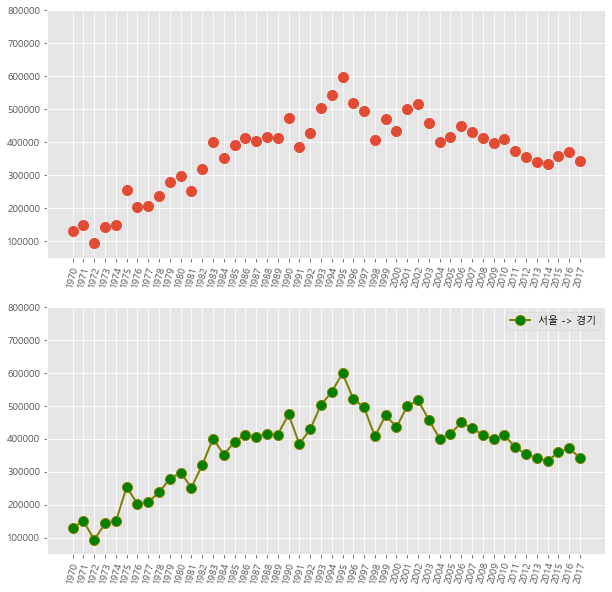

In [21]:
# 스타일 서식 지정
plt.style.use( 'ggplot' )

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 10, 10 ) )   
ax1 = fig.add_subplot( 2, 1, 1 )
ax2 = fig.add_subplot( 2, 1, 2 )

# axe 객체에 plot 함수로 그래프 출력
ax1.plot( sr_one, 'o', markersize = 10 )
ax2.plot( sr_one, marker = 'o', markerfacecolor = 'green', markersize = 10, 
         color = 'olive', linewidth = 2, label = '서울 -> 경기' )
ax2.legend( loc = 'best' )

#y축 범위 지정 (최소값, 최대값)
ax1.set_ylim( 50000, 800000 )
ax2.set_ylim( 50000, 800000 )

# 축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels( sr_one.index, rotation = 75 )
ax2.set_xticklabels( sr_one.index, rotation = 75 )

plt.show()  # 변경사항 저장하고 그래프 출력

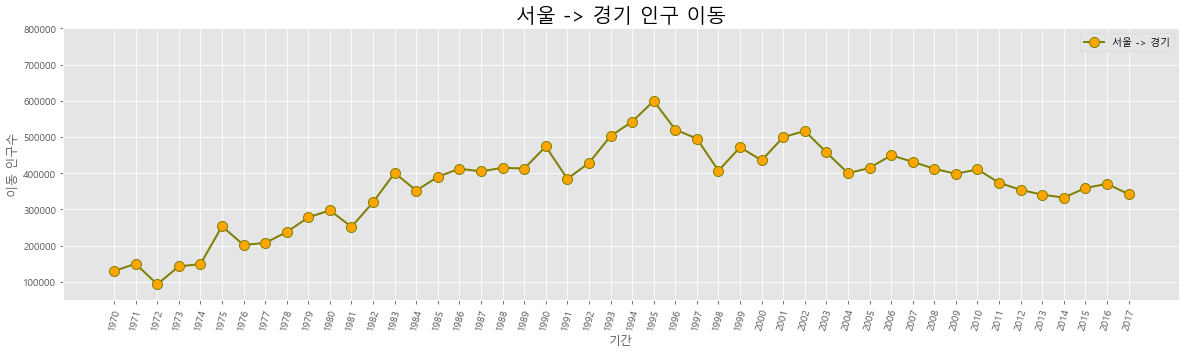

In [22]:
# 스타일 서식 지정
plt.style.use( 'ggplot' )

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 20, 5 ) )   
ax = fig.add_subplot( 1, 1, 1 )

# axe 객체에 plot 함수로 그래프 출력
ax.plot( sr_one, marker = 'o', markerfacecolor = 'orange', markersize = 10, 
        color = 'olive', linewidth = 2, label = '서울 -> 경기' )
ax.legend( loc = 'best' )

#y축 범위 지정 (최소값, 최대값)
ax.set_ylim( 50000, 800000 )

# 차트 제목 추가
ax.set_title( '서울 -> 경기 인구 이동', size = 20 )

# 축이름 추가
ax.set_xlabel( '기간', size = 12 )
ax.set_ylabel( '이동 인구수', size = 12 )

# 축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels( sr_one.index, rotation = 75 )

# 축 눈금 라벨 크기
ax.tick_params( axis = "x", labelsize = 10 )
ax.tick_params( axis = "y", labelsize = 10 )

plt.show()  # 변경사항 저장하고 그래프 출력

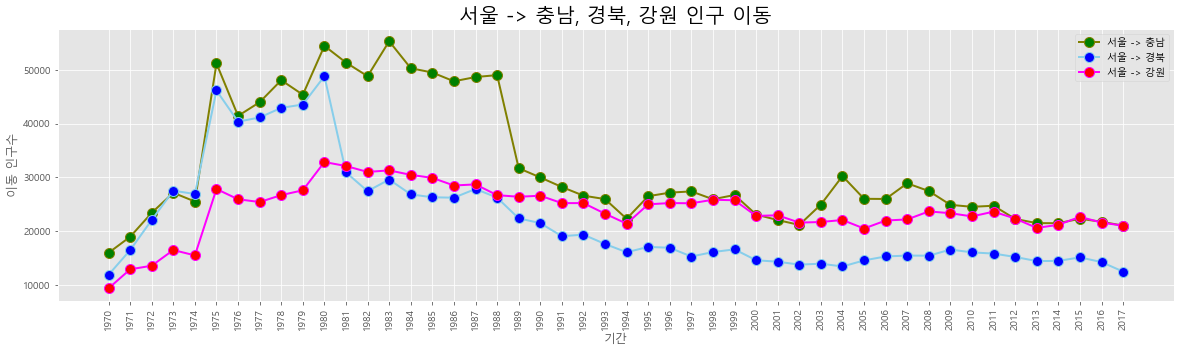

In [23]:
# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list( map( str, range( 1970, 2018 ) ) )
df_3 = df_seoul.loc[ [ '충청남도','경상북도', '강원도' ], col_years ]

# 스타일 서식 지정
plt.style.use( 'ggplot' ) 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 20, 5 ) )   
ax = fig.add_subplot( 1, 1, 1 )

# axe 객체에 plot 함수로 그래프 출력
ax.plot( col_years, df_3.loc[ '충청남도', : ], marker = 'o', markerfacecolor = 'green', 
         markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남' )
ax.plot( col_years, df_3.loc[ '경상북도', : ], marker = 'o', markerfacecolor = 'blue', 
         markersize=10, color = 'skyblue', linewidth = 2, label = '서울 -> 경북' )
ax.plot( col_years, df_3.loc[ '강원도', : ], marker = 'o', markerfacecolor = 'red', 
         markersize=10, color = 'magenta', linewidth = 2, label = '서울 -> 강원' )

# 범례 표시
ax.legend( loc = 'best' )

# 차트 제목 추가
ax.set_title( '서울 -> 충남, 경북, 강원 인구 이동', size = 20 )

# 축이름 추가
ax.set_xlabel( '기간', size = 12 )
ax.set_ylabel( '이동 인구수', size = 12 )

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels( col_years, rotation = 90 )

# 축 눈금 라벨 크기
ax.tick_params( axis = "x", labelsize = 10 )
ax.tick_params( axis = "y", labelsize = 10 )

plt.show()  # 변경사항 저장하고 그래프 출력

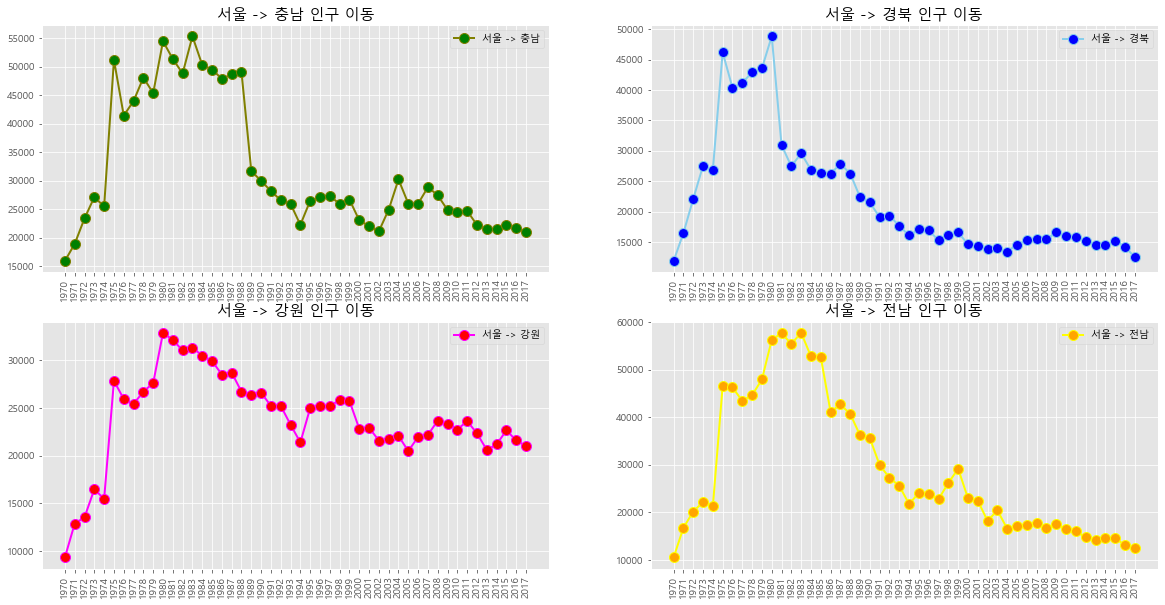

In [25]:
# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list( map( str, range( 1970, 2018 ) ) )
df_4 = df_seoul.loc[ [ '충청남도','경상북도', '강원도', '전라남도' ], col_years ]

# 스타일 서식지정
plt.style.use( 'ggplot' ) 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 20, 10 ) )   
ax1 = fig.add_subplot( 2, 2, 1 )
ax2 = fig.add_subplot( 2, 2, 2 )
ax3 = fig.add_subplot( 2, 2, 3 )
ax4 = fig.add_subplot( 2, 2, 4 )

# axe 객체에 plot 함수로 그래프 출력
ax1.plot( col_years, df_4.loc[ '충청남도', : ], marker = 'o', markerfacecolor = 'green', 
          markersize = 10, color = 'olive', linewidth = 2, label = '서울 -> 충남' )
ax2.plot( col_years, df_4.loc[ '경상북도', : ], marker = 'o', markerfacecolor = 'blue', 
          markersize = 10, color = 'skyblue', linewidth = 2, label = '서울 -> 경북' )
ax3.plot( col_years, df_4.loc[ '강원도', : ], marker = 'o', markerfacecolor = 'red', 
          markersize = 10, color = 'magenta', linewidth = 2, label = '서울 -> 강원' )
ax4.plot( col_years, df_4.loc[ '전라남도', : ], marker = 'o', markerfacecolor = 'orange', 
          markersize = 10, color = 'yellow', linewidth = 2, label = '서울 -> 전남' )

# 범례 표시
ax1.legend( loc = 'best' )
ax2.legend( loc = 'best' )
ax3.legend( loc = 'best' )
ax4.legend( loc = 'best' )

# 차트 제목 추가
ax1.set_title( '서울 -> 충남 인구 이동', size = 15 )
ax2.set_title( '서울 -> 경북 인구 이동', size = 15 )
ax3.set_title( '서울 -> 강원 인구 이동', size = 15 )
ax4.set_title( '서울 -> 전남 인구 이동', size = 15 )

# 축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels( col_years, rotation = 90 )
ax2.set_xticklabels( col_years, rotation = 90 )
ax3.set_xticklabels( col_years, rotation = 90 )
ax4.set_xticklabels( col_years, rotation = 90 )

plt.show()  # 변경사항 저장하고 그래프 출력

## 막대 그래프( bar plot )

- 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대로 표현한다.
- 막대 높이의 상대적 길이 차이를 통해 값의 크고 작음을 설명한다.
- 세로형과 가로형 막대 그래프 두 종류가 있다. 다만, 세로형의 경우 정보 제공 측면에서 모면 선 그래프와 큰 차이가 없다.
- 세로형 막대 그래프는 시간적으로 차이가 나는 두 점에서 데이터 값의 차이를 잘 설명한다. 즉 시계열 데이터를 표현하는데 적합하다.

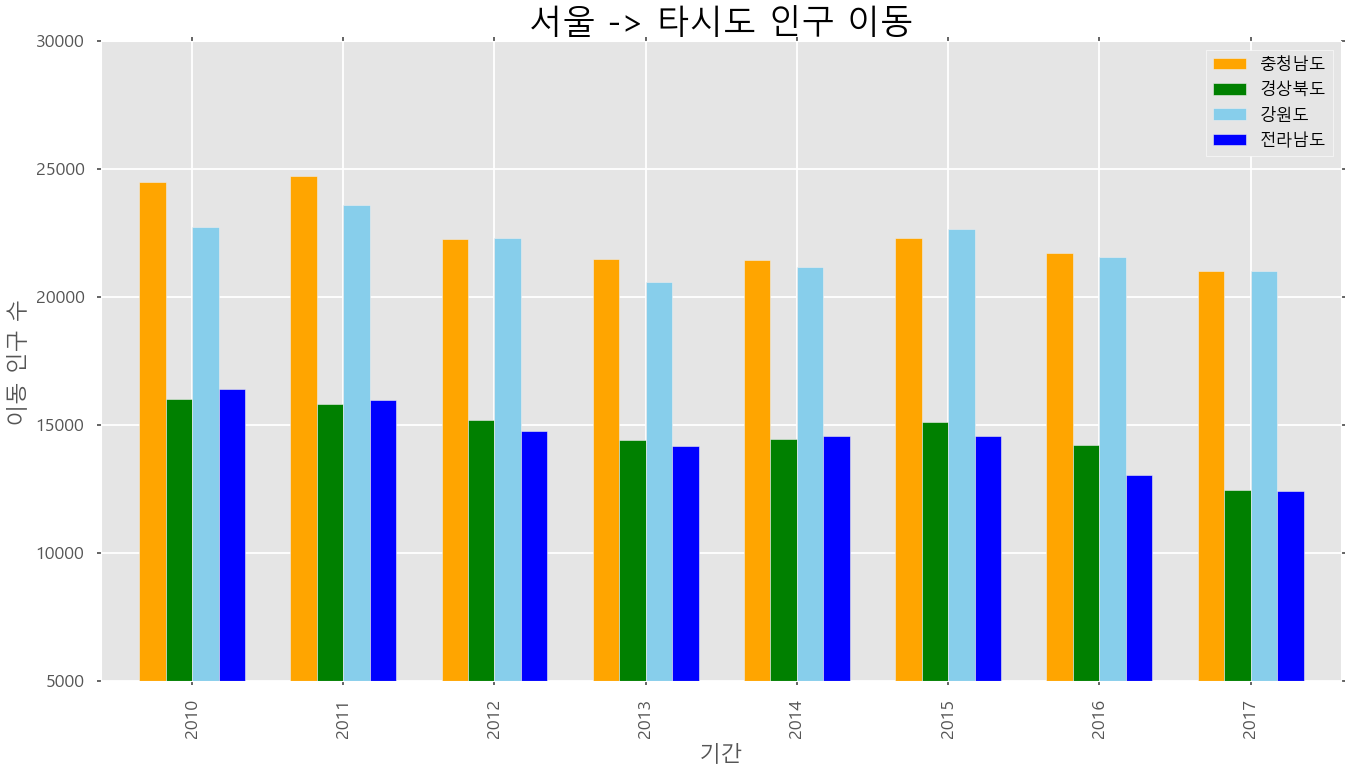

In [45]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( '시도별 전출입 인구수.xlsx', fillna = 0, header = 0 )

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna( method = 'ffill' )

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = ( df[ '전출지별' ] == '서울특별시' ) & ( df[ '전입지별' ] != '서울특별시' ) 
df_seoul = df[ mask ]
df_seoul = df_seoul.drop( [ '전출지별' ], axis = 1 )
df_seoul.rename( { '전입지별':'전입지' }, axis = 1, inplace = True )
df_seoul.set_index('전입지', inplace = True )

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list( map( str, range( 2010, 2018 ) ) )     
df_4 = df_seoul.loc[ [ '충청남도','경상북도', '강원도', '전라남도' ], col_years ]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use( 'ggplot' ) 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map( int )

# 막대 그래프 그리기
df_4.plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.7,
           color = [ 'orange', 'green', 'skyblue', 'blue' ] )

plt.title( '서울 -> 타시도 인구 이동', size = 30 )
plt.ylabel( '이동 인구 수', size = 20 )
plt.xlabel( '기간', size = 20 )
plt.ylim( 5000, 30000 )
plt.legend( loc = 'best', fontsize = 15 )

plt.show()

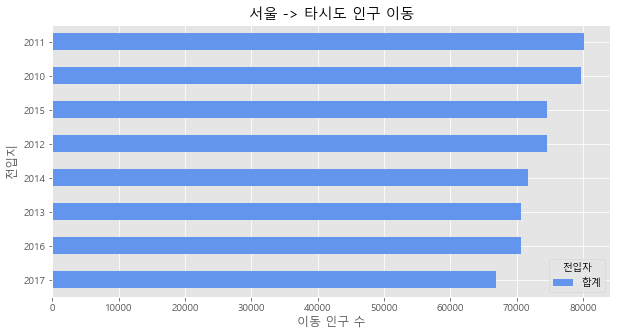

In [27]:
# 2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가
df_4[ '합계' ] = df_4.sum( axis = 1 )

# 가장 큰 값부터 정렬
df_total = df_4[ [ '합계' ] ].sort_values( by = '합계', ascending = True )

# 스타일 서식 지정
plt.style.use( 'ggplot' ) 

# 수평 막대 그래프 그리기
df_total.plot( kind = 'barh', color = 'cornflowerblue', width = 0.5, figsize = ( 10, 5 ) )

plt.title( '서울 -> 타시도 인구 이동' )
plt.ylabel( '전입지' )
plt.xlabel( '이동 인구 수' )

plt.show()

#### 2축 그래프 그리기

In [28]:
plt.style.use( 'ggplot' )   # 스타일 서식 지정
plt.rcParams[ 'axes.unicode_minus' ] = False   # 마이너스 부호 출력 설정

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( './남북한발전전력량.xlsx', convert_float = True )
df = df.loc[ 5:9 ]
df.drop( '전력량 (억㎾h)', axis = 'columns', inplace = True )
df.set_index( '발전 전력별', inplace = True )
df = df.T 

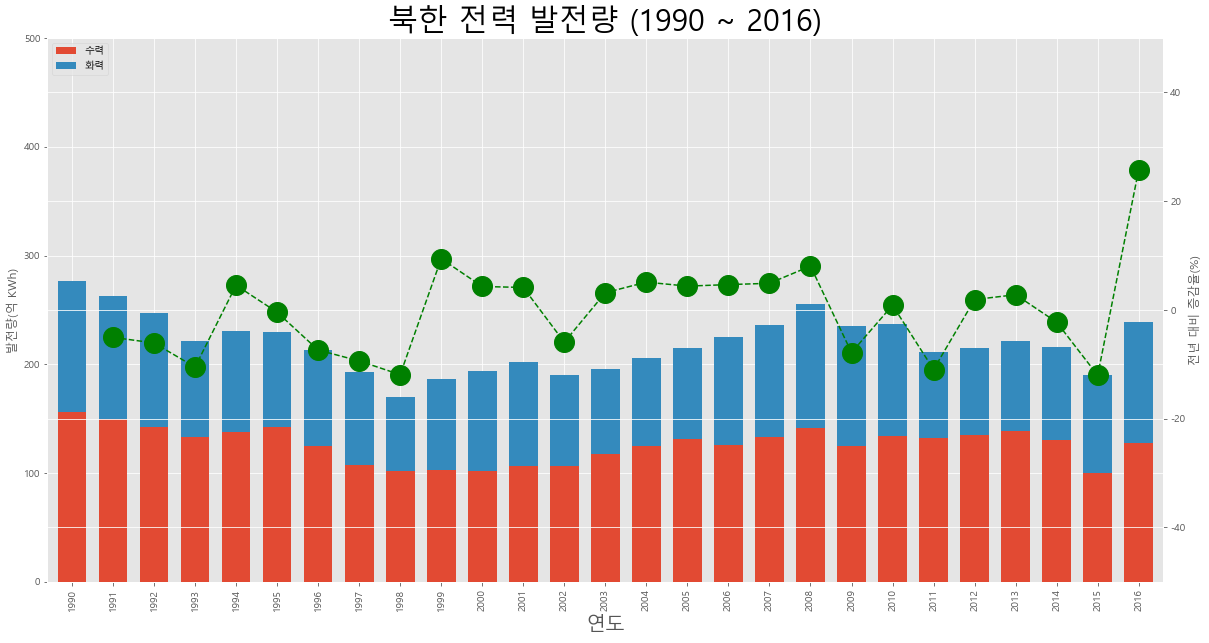

In [30]:
# 증감율(변동률) 계산
df = df.rename( columns = { '합계' : '총발전량' } )
df[ '총발전량 - 1년' ] = df[ '총발전량' ].shift(1)
df[ '증감율' ] = ( ( df[ '총발전량' ] / df[ '총발전량 - 1년' ] ) - 1 ) * 100      

# 2축 그래프 그리기
ax1 = df[ [ '수력', '화력' ] ].plot( kind = 'bar', figsize = ( 20, 10 ), width = 0.7, stacked = True )  
ax2 = ax1.twinx()
ax2.plot( df.index, df.증감율, ls = '--', marker = 'o', markersize = 20, 
          color ='green', label = '전년대비 증감율(%)' )  

ax1.set_ylim( 0, 500 )
ax2.set_ylim( -50, 50 )

ax1.set_xlabel( '연도', size = 20 )
ax1.set_ylabel( '발전량(억 KWh)' )
ax2.set_ylabel( '전년 대비 증감율(%)' )

plt.title( '북한 전력 발전량 (1990 ~ 2016)', size = 30 )
ax1.legend( loc = 'upper left' )

plt.show()

## 면적 그래프( area plot )

- 각 열의 데이터를 선 그래프로 구현하는데, 선 그래프와 x축 사이의 공간에 색을 입혀준다.
- 색의 투명도( alpha )는 기본값 0.5로 투과되어 보인다.( 투명도 : 0 ~ 1 범위 )

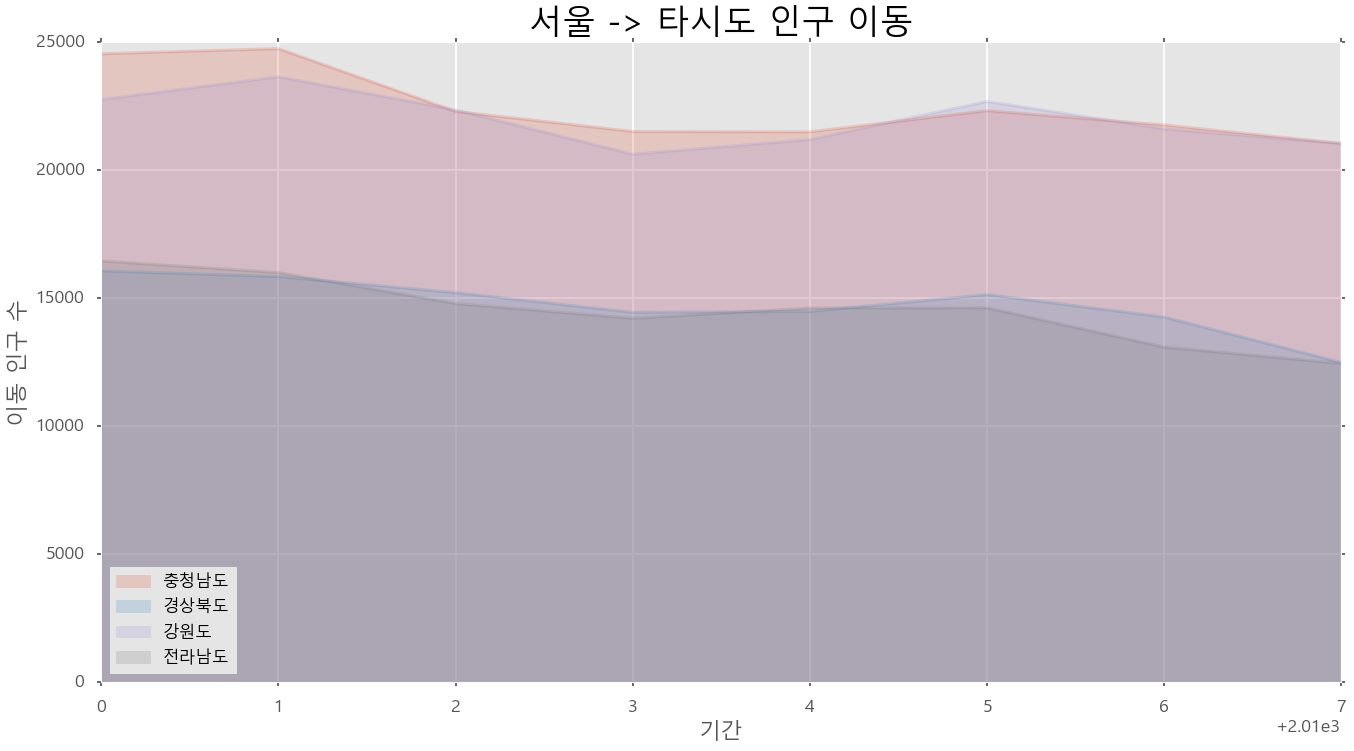

In [47]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel( '시도별 전출입 인구수.xlsx', fillna = 0, header = 0 )

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna( method = 'ffill' )

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = ( df[ '전출지별' ] == '서울특별시' ) & ( df[ '전입지별' ] != '서울특별시' ) 
df_seoul = df[ mask ]
df_seoul = df_seoul.drop( [ '전출지별' ], axis = 1 )
df_seoul.rename( { '전입지별':'전입지' }, axis = 1, inplace = True )
df_seoul.set_index('전입지', inplace = True )

# 서울에서 '충청남도','경상북도', '강원도', '전라남도'로 이동한 인구 데이터 값만 선택
col_years = list( map( str, range( 2010, 2018 ) ) )     
df_4 = df_seoul.loc[ [ '충청남도','경상북도', '강원도', '전라남도' ], col_years ]
df_4 = df_4.transpose()

# 스타일 서식 지정
plt.style.use( 'ggplot' ) 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map( int )

# 면적 그래프 그리기
df_4.plot( kind = 'area', stacked = False, alpha = 0.2, figsize = ( 20, 10 ) )

plt.title( '서울 -> 타시도 인구 이동', size = 30 )
plt.ylabel( '이동 인구 수', size = 20 )
plt.xlabel( '기간', size = 20 )
plt.legend( loc = 'best', fontsize = 15 )

plt.show()

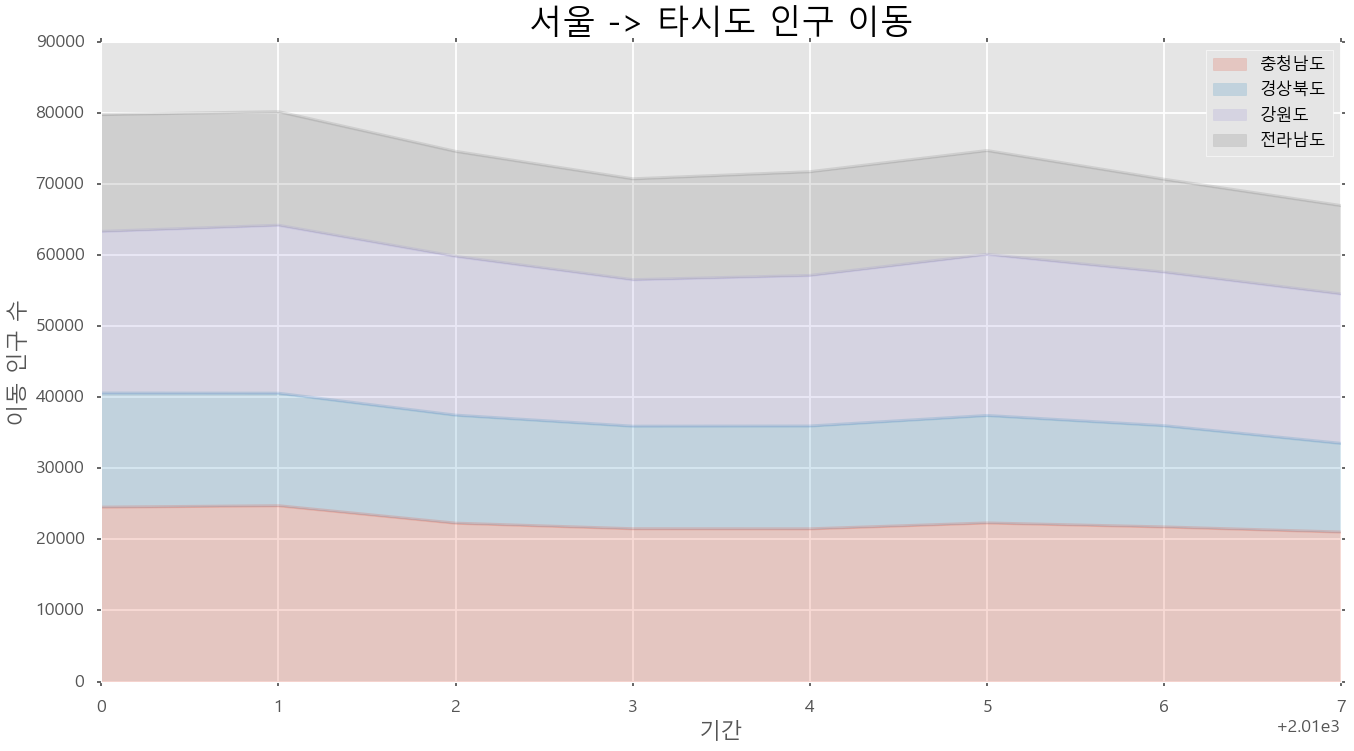

In [48]:
# 스타일 서식 지정
plt.style.use( 'ggplot' ) 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map( int )

# 면적 그래프 그리기
df_4.plot( kind = 'area', stacked = True, alpha = 0.2, figsize = ( 20, 10 ) )

plt.title( '서울 -> 타시도 인구 이동', size = 30 )
plt.ylabel( '이동 인구 수', size = 20 )
plt.xlabel( '기간', size = 20 )
plt.legend( loc = 'best', fontsize = 15 )

plt.show()

In [ ]:
# 스타일 서식 지정
plt.style.use( 'ggplot' ) 

# 데이터프레임의 인덱스를 정수형으로 변경 (x축 눈금 라벨 표시)
df_4.index = df_4.index.map( int )

# 면적 그래프 axe 객체 생성
ax = df_4.plot( kind='area', stacked=True, alpha=0.2, figsize=(20, 10))
print(type(ax))

# axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

## 히스토그램( histogram )

- 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현한다.
- x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수( 빈도 )를 y축에 표시한다.
- 구간을 나누는 간겨의 키기에 따라 빈도가 달라지고 히스토그램의 모양이 변한다.

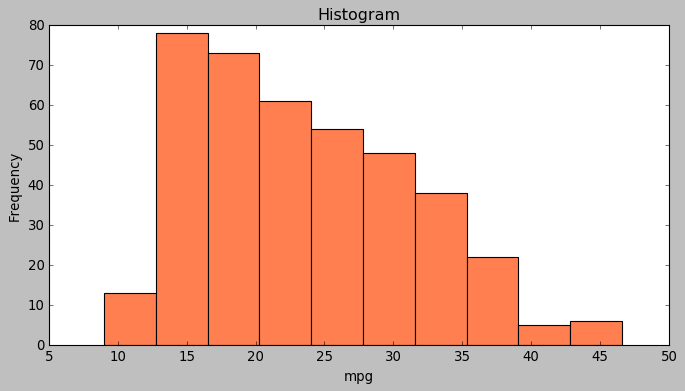

In [31]:
plt.style.use( 'classic' )   # 스타일 서식 지정

# read_csv() 함수로 df 생성
df = pd.read_csv( './/auto-mpg.csv', header = None )

# 열 이름을 지정
df.columns = [ 'mpg','cylinders', 'displacement', 'horsepower', 'weight',
               'acceleration', 'model year', 'origin', 'name' ]

# 연비(mpg) 열에 대한 히스토그램 그리기
df[ 'mpg' ].plot( kind = 'hist', bins = 10, color = 'coral', figsize = ( 10, 5 ) )

# 그래프 꾸미기
plt.title( 'Histogram' )
plt.xlabel( 'mpg' )

plt.show()

## 산점도( scatter plot )

- 서로 다른 두 변수 사이의 관계를 나타낸다. 이때 각 변수는 연속되는 값을 갖는다.
- 일반적으로 정수형( int64 ) 또는 실수형( float64 ) 값이다.
- 2개의 연속 변수를 각각 x축과 y축에 하나씩 놓고, 데이터 값이 위치하는 ( x, y ) 좌표를 찾아서 점으로 표시한다.
- 두 연속 변수의 관계를 보여준다는 점에서 선 그래프와 비숫하다.

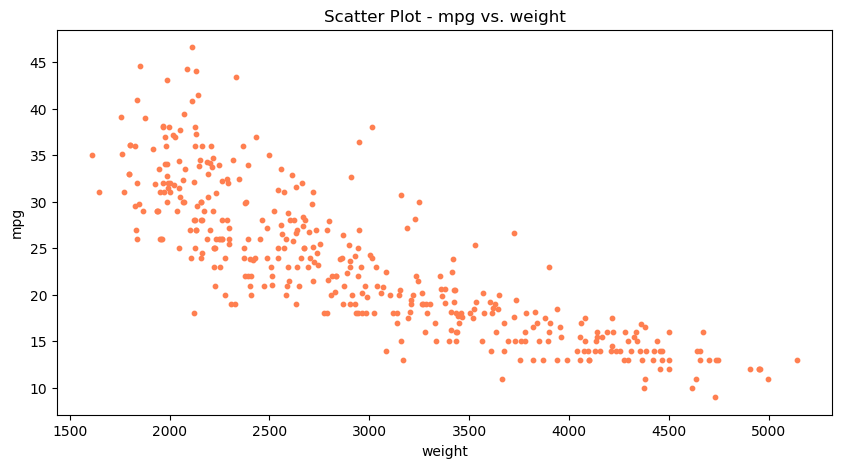

In [32]:
plt.style.use( 'default' )   # 스타일 서식 지정

# 연비(mpg)와 차중(weight) 열에 대한 산점도 그리기
df.plot( kind = 'scatter', x = 'weight', y = 'mpg',  c = 'coral', s = 10, figsize = ( 10, 5 ) )
plt.title( 'Scatter Plot - mpg vs. weight' )

plt.show()

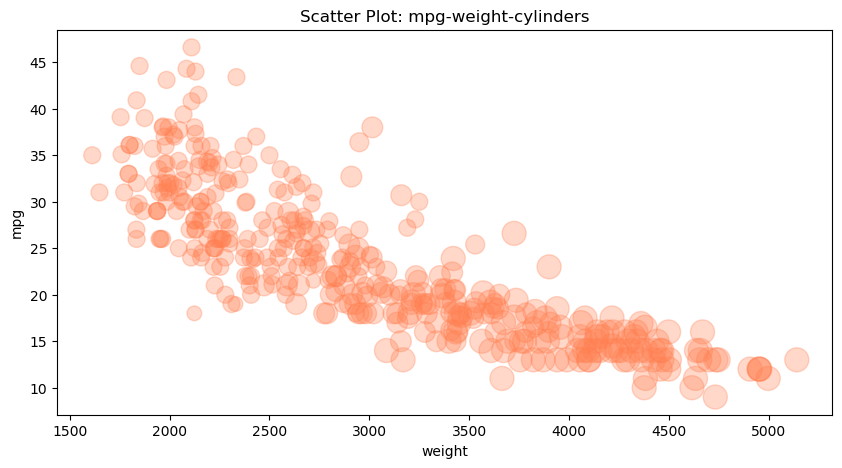

In [33]:
# cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders / df.cylinders.max() * 300

# 3개의 변수로 산점도 그리기 
df.plot( kind ='scatter', x = 'weight', y = 'mpg', c = 'coral', figsize = ( 10, 5 ),
         s =cylinders_size, alpha = 0.3 )
plt.title( 'Scatter Plot: mpg-weight-cylinders' )

plt.show()

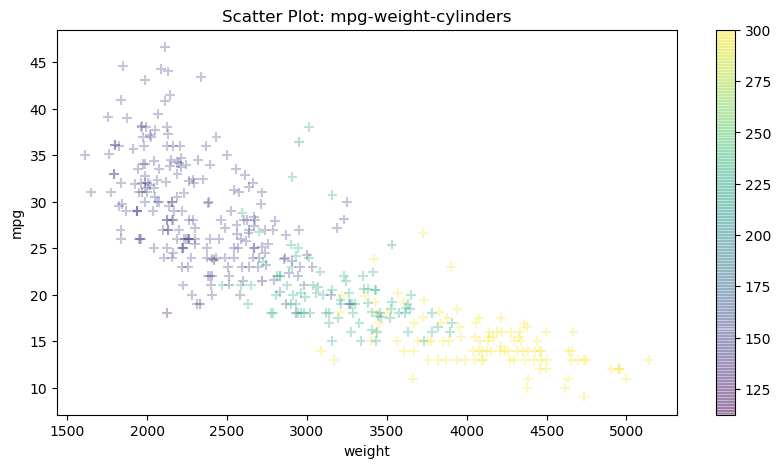

In [34]:
# 3개의 변수로 산점도 그리기 
df.plot( kind = 'scatter', x = 'weight', y = 'mpg', marker = '+', figsize = ( 10, 5 ),
         cmap = 'viridis', c = cylinders_size, s = 50, alpha = 0.3 )
plt.title( 'Scatter Plot: mpg-weight-cylinders' )

plt.savefig("./scatter.png")   
plt.savefig("./scatter_transparent.png", transparent=True)   

plt.show()

## 파이 차트( pie chart )

- 원을 파이 조각처럼 나누어서 표현한다.
- 조각의 크기는 해당 변수에 속하는 데이터 값의 크기에 비례한다.

In [35]:
# 데이터 개수 카운트를 위해 값 1을 가진 열을 추가
df[ 'count' ] = 1
df_origin = df.groupby( 'origin' ).sum()   # origin 열을 기준으로 그룹화, 합계 연산
df_origin.head()                           # 그룹 연산 결과 출력

,mpg,cylinders,displacement,weight,acceleration,model year,count
origin,,,,,,,
1,5000.8,1556,61229.5,837121.0,3742.4,18827,249
2,1952.4,291,7640.0,169631.0,1175.1,5307,70
3,2405.6,324,8114.0,175477.0,1277.6,6118,79


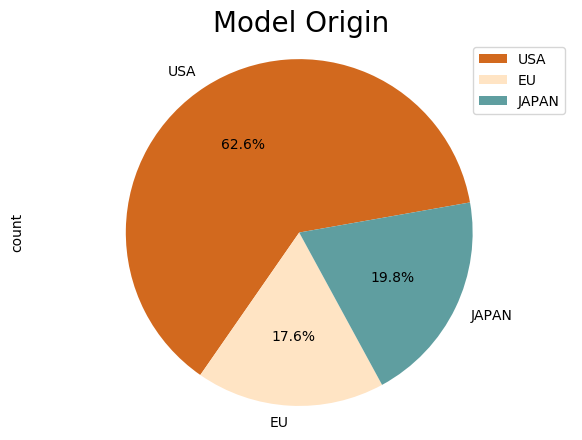

In [36]:
plt.style.use('default')   # 스타일 서식 지정

# 제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = [ 'USA', 'EU', 'JAPAN' ]

# 제조국가(origin) 열에 대한 파이 차트 그리기 – count 열 데이터 사용
df_origin[ 'count' ].plot( kind = 'pie', 
                           figsize = ( 7, 5 ),
                           autopct = '%1.1f%%',   # 퍼센트 % 표시
                           startangle = 10,       # 파이 조각을 나누는 시작점(각도 표시)
                           colors = [ 'chocolate', 'bisque', 'cadetblue' ]    # 색상 리스트
                         )

plt.title( 'Model Origin', size = 20 )
plt.axis( 'equal' )    # 파이 차트의 비율을 같게 (원에 가깝게) 조정
plt.legend( labels = df_origin.index, loc = 'upper right' )   # 범례 표시

plt.show()

## 박스 플롯( box plot )

- 범주형 데이터의 분포를 파악하는데 적합하다.
- 박스 플롯은 5개 통계 지표( 최소값, 1사분위수, 중간값, 3사분위수, 최대값 )을 제공한다.

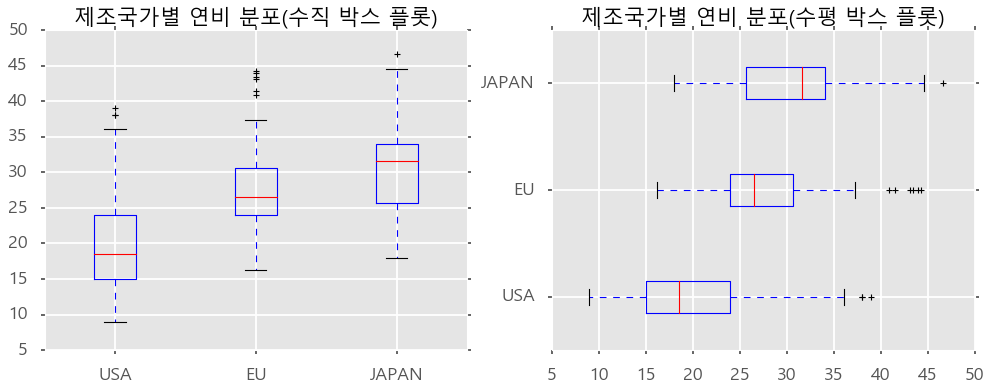

In [42]:
# Matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = 'c://Windows//Fonts//malgun.ttf' # 폰트 파일 위치
font_name = font_manager.FontProperties( fname = font_path ).get_name()
rc( 'font', family = font_name )

plt.style.use( 'seaborn-poster' )              # 스타일 서식 지정
plt.rcParams[ 'axes.unicode_minus' ] = False   # 마이너스 부호 출력 설정

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure( figsize = ( 15, 5 ) )   
ax1 = fig.add_subplot( 1, 2, 1 )
ax2 = fig.add_subplot( 1, 2, 2 )

# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot( x = [ df[df[ 'origin' ] == 1 ][ 'mpg' ],
                   df[df[ 'origin' ] == 2 ][ 'mpg' ],
                   df[df[ 'origin' ] == 3 ][ 'mpg' ] ], 
                   labels = [ 'USA', 'EU', 'JAPAN' ] )

ax2.boxplot(x = [df[df[ 'origin' ] == 1 ][ 'mpg' ],
                 df[df[ 'origin' ] == 2 ][ 'mpg' ],
                 df[df[ 'origin' ] == 3 ][ 'mpg' ] ], 
                 labels = [ 'USA', 'EU', 'JAPAN' ],
                 vert = False )

ax1.set_title( '제조국가별 연비 분포(수직 박스 플롯)' )
ax2.set_title( '제조국가별 연비 분포(수평 박스 플롯)' )

plt.show()